<a href="https://colab.research.google.com/github/ChandraShekhar-CSR/Big-Data/blob/main/Workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Lab


>To build a proper machine learning model we need clean data. However, almost all the datasets are dirty due to noise, outliers. It is also important to know the data to use the appropriate machine learning algorithm. Thus, in this exercise, we will try to explore the data, clean the data, find
insights, and finally train machine learning models.

1. There are so many data cleaning techniques, however, we will only focus on the most basic operations

2. There are some questions prepared for you to answer. Please double click on those cells and answer them.

3. To do this workshop you may use any IDE of your choice such as jupyter notebook, google colab or even VS code. However, it is recommended to avoid using tools that utilizes AI featuers such as auto code generation.

# Datasets Information

It is very important to undertand what kind of data we are dealing with before jumping into actual coding. The following things are to be taken into consideration before EDA and Model Training :

1. Understanding Data Source & Reliability

2. Understanding Features & Their Role

3. Ensuring Data Relevance for the Problem



## Dataset 1 : **Medical Students**

* About Dataset

> The dataset can be used for various purposes, including :

1. Medical research and analysis to identify patterns, trends, and correlations in patient data.
Developing predictive models for diagnosing diseases, predicting treatment outcomes, and identifying at-risk patients.

2. Evaluating the effectiveness of different medical interventions and treatment protocols.

3. Training machine learning algorithms for medical imaging analysis, disease classification, and patient risk stratification.

> The dataset consists of the following columns:

*  *StudentID:* Unique identifier for each medical student.

*  *Age:* Age of the student in years.

* *Gender:* Gender of the student (e.g., Male, Female).

* *Height:* Height of the student in cm.

* *Weight:* Weight of the student in kg.

* *Blood Type:* The student's blood group (e.g., A, B, O).

* *BMI:* The Body Mass Index, calculated from height and weight.

* *Temperature:* The student's body temperature in degrees Celsius.

* *Heart Rate:* The number of heartbeats per minute.

* *Blood Pressure:* The student's systolic blood pressure measurement.

* *Cholesterol:* The student's cholesterol level in mg/dL.

* *Diabetes:* Indicates whether the student has diabetes (Yes/No).

* *Smoking* Indicates whether the student is a smoker (Yes/No).


In [ ]:
# Connect Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part I

### 1. Import Necessary Libraries/Dependencies

> In the below cell, you are required to import all the necessary dependencies such as pandas, matplotlib as well as seaborn.

In [3]:
# Importing the pandas library, used for data manipulation and analysis
import pandas as pd
# Importing the numpy library, used for numerical operations and working with arrays
import numpy as np
# Importing the seaborn library, used for statistical data visualization
import seaborn as sns
# Importing the pyplot module from matplotlib, used for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

### 2. Load our dataset

> In the below, cell you are required to load our dataset into a pandas dataframe.

In [ ]:
# Lod the dataset (CSV file)
df1 = pd.read_csv("/content/drive/MyDrive/Big Data/sample_medical_students_dataset.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Mounted at /content/drive


### 3. Data Analysis

> Print the list feature names of our loaded dataset.

In [ ]:
print(df1.columns.tolist())

['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Diabetes', 'Smoking']


> Print the shape of our dataset (number of rows and columns)

In [ ]:
df1.shape

(50000, 13)

> Display the first 5 rows of our dataset. *Hint : head() method*

In [ ]:
print(df1.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0     48419.0  34.0    Male  172.793930  43.761668          O  14.656724   
1     64979.0  25.0  Female  155.370924  53.658217         AB  22.227813   
2     37531.0  24.0    Male  177.065466  41.897201          B  13.363410   
3     36473.0  34.0    Male  187.403636  83.172918         AB  23.682411   
4     13960.0  29.0    Male         NaN  92.665678         AB  35.423958   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0    99.080335        92.0           118.0        167.0      Yes      No  
1    98.238156        67.0            98.0        124.0       No      No  
2    99.243096        79.0           126.0        223.0       No     Yes  
3    98.462143        65.0            95.0        160.0       No      No  
4    98.450508        75.0           111.0        163.0       No      No  


> Display 5 random rows of our dataset. *Hint : sample() method*

In [ ]:
print(df1.sample())

       Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
48622     60882.0  26.0  Female  158.044722  99.587558          O  39.869895   

       Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
48622    99.309579        80.0           116.0        200.0       No      No  


> Check datatypes of each columns. *Hint : dtypes*

In [ ]:
df1.dtypes

,0
Student ID,float64
Age,float64
Gender,object
Height,float64
Weight,float64
Blood Type,object
BMI,float64
Temperature,float64
Heart Rate,float64
Blood Pressure,float64


> How many of our features are numerical and categorical ? Write a python code to fill the below 2 empty lists.

* num_cols : should contain name of columns with numerical data type.

* cat_cols : should contain name of columns with categorical data type.


In [ ]:
num_cols = ['StudentID', 'Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
cat_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

In [ ]:
print("Numerical columns : ", num_cols)
print("Categorical columns : ", cat_cols)
print("Number of numerical columns : ", len(num_cols))
print("Number of categorcal columns : ", len(cat_cols))

Numerical columns :  ['StudentID', 'Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
Categorical columns :  ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
Number of numerical columns :  9
Number of categorcal columns :  4


> Generate summary statistics our data that includes measurements like count, mean, standard deviation, minimum, maximum, and quartiles. *Hint : describe() method*

In [ ]:
# Print some statistical measurements of our numerical columns
print(df1.describe())

         Student ID           Age        Height        Weight           BMI  \
count  50000.000000  49934.000000  48752.000000  50000.000000  50000.000000   
mean   49835.464140     26.028578    174.898147     69.992555     23.365428   
std    28801.118493      4.883655     14.429881     17.310689      7.063461   
min        2.000000     18.000000    150.002125     40.000718     10.074837   
25%    24825.750000     22.000000    162.511419     54.976175     17.840544   
50%    49751.500000     26.000000    174.782445     70.073127     22.715855   
75%    74715.250000     30.000000    187.456113     85.007916     28.063988   
max    99999.000000     34.000000    199.998639     99.997668     44.355113   

        Temperature    Heart Rate  Blood Pressure   Cholesterol  
count  50000.000000  48362.000000    50000.000000  50000.000000  
mean      98.599156     79.513440      114.526160    184.268900  
std        0.499875     11.518227       14.372229     37.692965  
min       96.397835     

> For categorical columns, we will check how many unique classes they have and how frequently each class appears in the dataset.

> Below is an example of one categorical class - Gender

In [ ]:
# Count the occurrences of each unique value in the 'Gender' column of the DataFrame 'df1'
df1['Gender'].value_counts()

,count
Gender,
Female,24481
Male,24411


> Similarly do for the other categorical columns. *Hint : You might wana use the list you created for storing the categorical columns*

In [ ]:
# Iterate through the list of categorical columns
for col in cat_cols:
    # Print the name of the current column
    print(f"Value counts for column '{col}':")

    # Use the value_counts() method to count the occurrences of each unique value in the current column
    print(df1[col].value_counts())
    print("-" * 20) #separator for better readability

Value counts for column 'Gender':
Gender
Female    24481
Male      24411
Name: count, dtype: int64
--------------------
Value counts for column 'Blood Type':
Blood Type
B     12709
O     12562
A     12463
AB    12266
Name: count, dtype: int64
--------------------
Value counts for column 'Diabetes':
Diabetes
No     45067
Yes     4933
Name: count, dtype: int64
--------------------
Value counts for column 'Smoking':
Smoking
No     39266
Yes     9785
Name: count, dtype: int64
--------------------


### 4. Cleaning Data

> Removing column 'Student ID' as it's not relevant for our analysis or modeling

In [ ]:
# remove student Id column as it's not relevant for our analysis or modeling
df1.drop(columns=["Student ID"], inplace=True)

> Check how many rows are duplicated. *Hint : duplicated() and sum() method*

In [ ]:
print(df1.duplicated().sum())

5146


> Drop duplicate rows. *Hint : drop_duplicates() method*

In [ ]:
# drop duplicate rows
print(f"Rows before removing duplicates: {df1.shape[0]}")
# Your code here
print(f"Rows after removing duplicates: {df1.shape[0]}")

Rows before removing duplicates: 50000
Rows after removing duplicates: 50000


> Check for null data. *Hint : isnull() and sum() method*

In [ ]:
print(df1.isnull().sum())

Age                 66
Gender            1108
Height            1248
Weight               0
Blood Type           0
BMI                  0
Temperature          0
Heart Rate        1638
Blood Pressure       0
Cholesterol          0
Diabetes             0
Smoking            949
dtype: int64


> If null data are found we need to handle them accordingly. we can consider applying one of the below approaches:


1. Remove Rows with Missing Values

2. Fill Missing Values with mean, meadian or mode.

> *However, to complete this workshop you are required to take the second approach which means filling the null values with mean or median if the column is numerical or mode if it is categorical.*

**Note :** We use the mean to fill missing values in numerical columns when there are no outliers. If the column contains outliers, we use the median instead, as it is less affected by extreme values.

In [ ]:
# example code to fill null values with mean
df1.loc[:, 'Age'] = df1['Age'].fillna(df1['Age'].median())
df1['Age'].isnull().sum()

0

> Similarly do it for other columns cotaining null data

In [ ]:
df1.loc[:, 'Weight'] = df1['Weight'].fillna(df1['Weight'].median)
df1['Weight'].isnull().sum()

0

In [ ]:
for col in cat_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])
    print(f"Null values in '{col}' after filling: {df1[col].isnull().sum()}")

Null values in 'Gender' after filling: 0
Null values in 'Blood Type' after filling: 0
Null values in 'Diabetes' after filling: 0
Null values in 'Smoking' after filling: 0


In [ ]:
# Check for null data in each column
print(df1.isnull().sum())

Age                  0
Gender               0
Height            1248
Weight               0
Blood Type           0
BMI                  0
Temperature          0
Heart Rate        1638
Blood Pressure       0
Cholesterol          0
Diabetes             0
Smoking              0
dtype: int64


> Check for outliers in numerical columns

* Outliers are data points that significantly differ from the rest of the dataset. They are unusually high or low values that do not follow the general pattern of the data.

* For example, in a dataset of students' heights, if most students are between 150 cm and 180 cm, but there is a student with a height of 250 cm, that is likely an outlier.

* Outliers needs to be handled as they can negatively impact machine learning models and statistical analysis.

* There are 3 approches we can take to identify outliers:

  1. Using Boxplots (Visualization)

  2. Using IQR (Interquartile Range)

  3. Using Z-score (Standard Deviation)


> For this workshop we are going to use the **IQR method** to detect outliers.

In [ ]:
num_cols.remove("StudentID") # Removing 'Student ID' from the list.

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outlier_count
    return outliers

# Assuming 'df1' and 'num_cols' are defined in your previous code
# Detect outliers
outliers_iqr = detect_outliers_iqr(df1, columns=num_cols)

# Print number of outliers in each numerical column
print("Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")


Outliers detected using IQR method:
Age: 0 outliers
Height: 0 outliers
Weight: 0 outliers
BMI: 39 outliers
Temperature: 342 outliers
Heart Rate: 0 outliers
Blood Pressure: 0 outliers
Cholesterol: 0 outliers


> Since BMI and Temperature have outliers, we can handle them by replacing outliers with the nearest valid values (min/max limits from IQR)

In [ ]:
# Function to replace outliers with min/max based on IQR
def replace_outliers_with_min_max(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace lower outliers with the minimum valid value
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

    # Replace upper outliers with the maximum valid value
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

> Handle the outliers. *Hint : use the above replace_outliers_with_min_max() function*

In [ ]:
# Apply to columns which have outliers
for col in ['BMI', 'Temperature']:
    replace_outliers_with_min_max(df1, col)

In [ ]:
# Again check for outliers
outliers_iqr = detect_outliers_iqr(df1, columns=num_cols)
# Print number of outliers in each numerical column
print("Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")

Outliers detected using IQR method:
Age: 0 outliers
Height: 0 outliers
Weight: 0 outliers
BMI: 0 outliers
Temperature: 0 outliers
Heart Rate: 0 outliers
Blood Pressure: 0 outliers
Cholesterol: 0 outliers


### 5. Data Visualisation

**Histogram of Age**

* A histogram is a graphical representation of the distribution of a dataset.
* It displays the frequency or count of data points that fall within certain ranges or bins.
* A histogram shows us the frequency distribution of continuous variables.

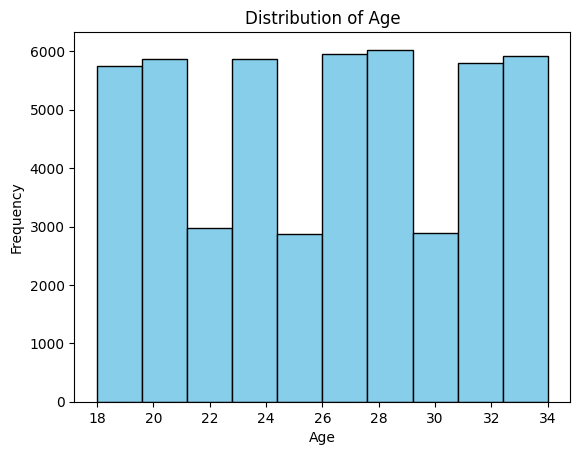

In [ ]:
# Histogram for Age
plt.hist(df1['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> What is the most common age range (peak of the histogram) ?

> Answer : From the histogram, it appears that the age ranges 18-20, 24-26, 28-30, and 32-34 have the highest bars, meaning they are the most frequent age groups.

**Bar Plot for Gender Count**

* Bar plots are used to represent categorical data with rectangular bars, where the length or height of each bar is proportional to the value of the category it represents.

* They are ideal for comparing different categories (e.g., counts of different genders, countries, or product sales).

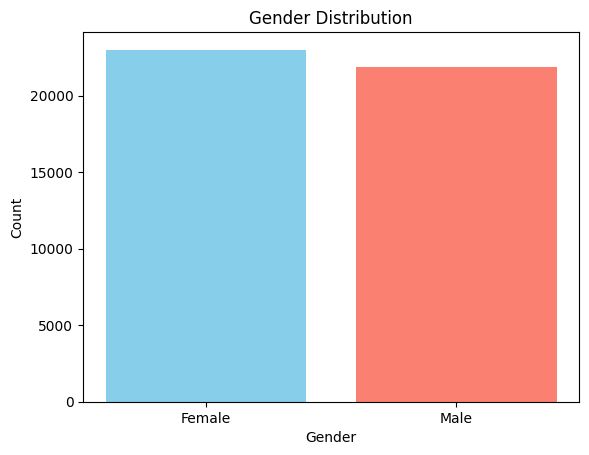

In [ ]:
# Bar plot for Gender
gender_counts = df1['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

> 1. Which gender has the highest count?

> Answer : Female has thge highest count.

> 2. Is the distribution balanced, or is there a significant difference between genders?

> Answer : The distribution appears to be relatively balanced, as the counts for both genders are quite similar.

**Box Plot of BMI**

> A box plot is a graphical representation of the distribution of numerical data through five key summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

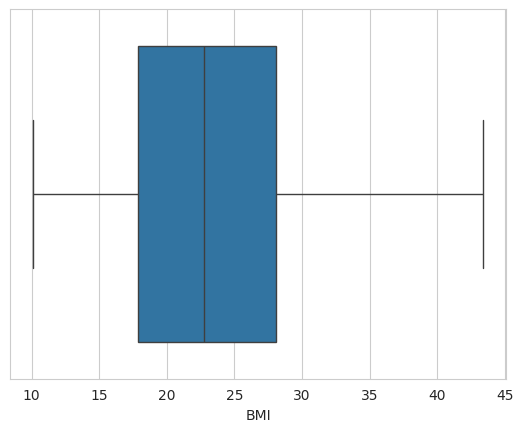

In [ ]:
# Set the seaborn plot style to whitegrid
sns.set_style("whitegrid")
# Create a box plot of the "Weight" column of the DataFrame
sns.boxplot(x = df1["BMI"])
plt.show()

> 1. What is the median BMI (the middle line in the box)?

> Answer : The middle line inside the box represents the median BMI, which appears to be around 23.

> 2. What is the interquartile range (IQR) (distance between Q1 and Q3)?

> Answer : The IQR is the distance between the first quartile (Q1) and the third quartile (Q3). From the box plot, Q1 seems to be around 19, and Q3 is around 28, so the IQR is 28 - 19 = 9.

> 3. Are there any outliers (points outside the whiskers)?

> Answer : In this box plot, there are no points outside the whiskers, indicating that there are no outliers.

**Scatter plot for BMI vs. Weight**

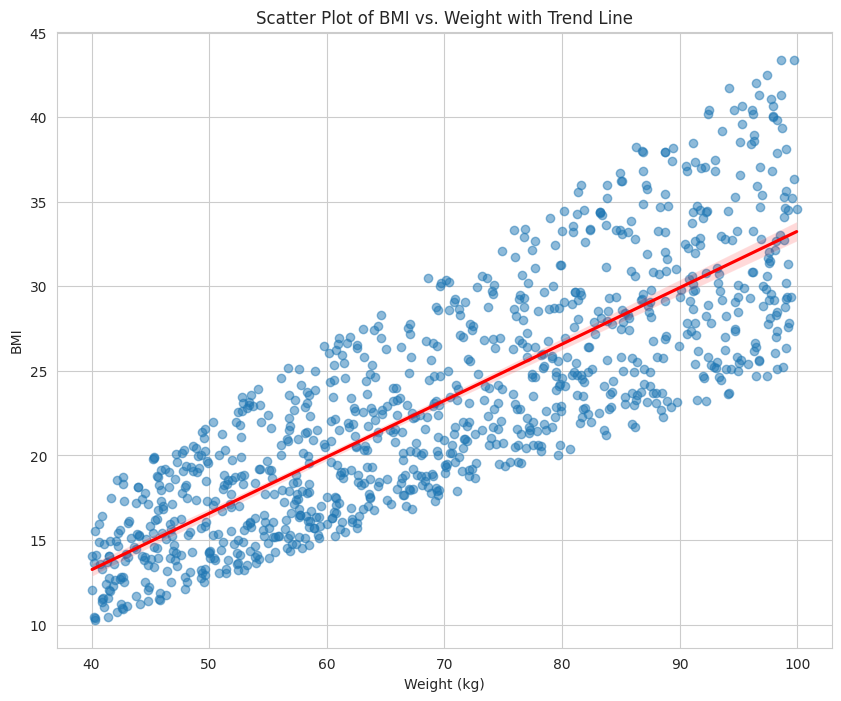

In [ ]:
# Randomly sample 1000 rows from the DataFrame 'df1' and store it in 'df_sampled'
df_sampled = df1.sample(1000)
# Set the figure size for the plot
plt.figure(figsize=(10, 8))
# Create a regression plot (scatter plot with a trend line) for 'Weight' vs 'BMI'
# scatter_kws controls the transparency of the scatter points, and line_kws sets the color of the trend line
sns.regplot(x=df_sampled['Weight'], y=df_sampled['BMI'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# Set the title of the plot
plt.title('Scatter Plot of BMI vs. Weight with Trend Line')
# Set the labels for the x and y axes
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
# Enable grid lines on the plot
plt.grid(True)
# Display the plot
plt.show()

> 1. Does the scatter plot confirm a strong positive correlation between Weight and BMI?

> Answer : Yes, the scatter plot confirms a strong positive correlation between weight and BMI. The points show an upward trend, and the red trend line indicates a consistent increase in BMI as weight increases.



> 2. Is the red trend line steep or gradual? What does that indicate about how weight affects BMI?

> Answer : The red trend line is moderately steep, indicating that BMI increases significantly as weight increases. This suggests that weight has a strong influence on BMI, meaning that even moderate changes in weight can lead to noticeable changes in BMI.

**Pie Chart for Blood Type Distribution**

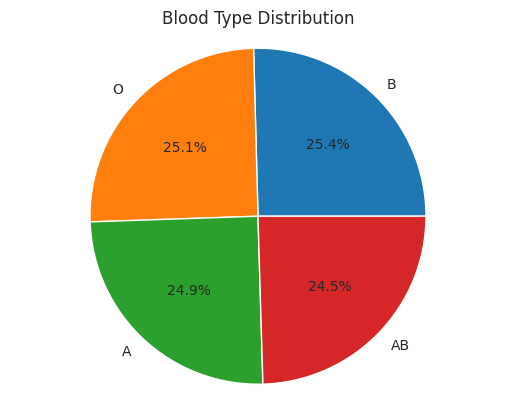

In [ ]:
# Pie chart for Blood Type distribution
blood_type_counts = df1['Blood Type'].value_counts()
plt.pie(blood_type_counts, labels=blood_type_counts.index, autopct='%1.1f%%')
plt.title('Blood Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

> 1. Which blood type is the most common among students?

> Answer : The blood type O is the most common among students.

> 2. Which blood type is the least common?

> Answer : The bloodtype AB is the least common.

**Heatmap for Correlation Matrix**

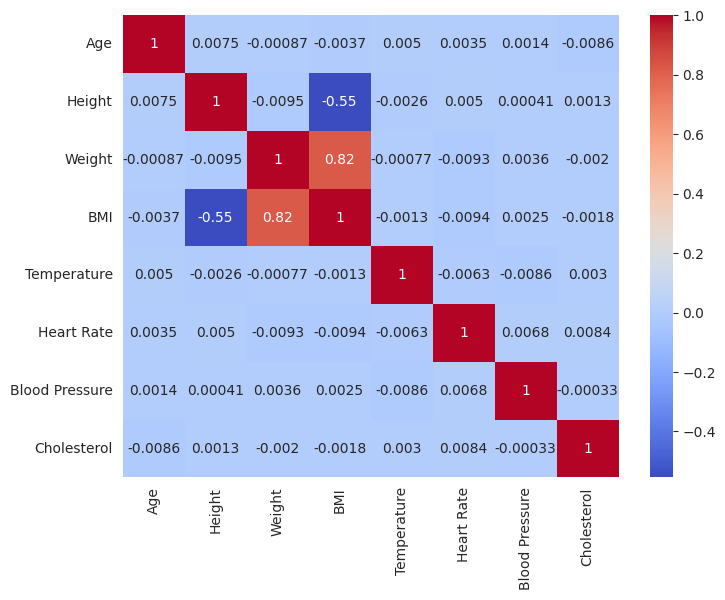

In [ ]:
# Compute correlation matrix
corr = df1[['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']].corr()
# Set figure size
plt.figure(figsize=(8, 6))  # Increase the figure size (width, height)
# Plot a heatmap of the correlation matrix with annotations and the 'coolwarm' color map
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

> 1. Which columns are most strongly correlated with each other?

> Answer : The strongest correlation is between Weight and BMI with a correlation coefficient of 0.82. This indicates that as weight increases, BMI also tends to increase significantly.

> 2. Which columns show the weakest correlation with each other?

> Answer : The weakest correlation is between Blood Pressure and Cholesterol, with a correlation coefficient close to -0.00033, indicating almost no relationship between these two variables.

> 3. Based on the correlation matrix, do taller individuals tend to weigh more?

> Answer : No, the correlation between Height and Weight is -0.0095, which is very close to zero. This suggests that there is no significant relationship between height and weight in this dataset.

### 6. Data Preparation

> Two main goals in data pre-processing:

1. Clean the data to address data quality issues (We've already done this part).

2. Transform the raw data to make it suitable for model building.

In [ ]:
# check for categorical columns to convert it into numerical form for model building
cat_cols

['Gender', 'Blood Type', 'Diabetes', 'Smoking']

> Use **LabelEncoder** to transform our categorical column into numerical format.

> Example code :

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print("Gender dtype before encoding : ", df1['Gender'].dtypes)
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
print("Gender dtype after encoding : ", df1['Gender'].dtypes)

Gender dtype before encoding :  object
Gender dtype after encoding :  int64


> Similarly do for other categorical columns

In [ ]:
#transform categorical columns into numerical format

for col in ['Blood Type', 'Diabetes', 'Smoking']:
    label_encoder = LabelEncoder()
    print(f"{col} dtype before encoding : ", df1[col].dtypes)
    df1[col] = label_encoder.fit_transform(df1[col])
    print(f"{col} dtype after encoding : ", df1[col].dtypes)

Blood Type dtype before encoding :  object
Blood Type dtype after encoding :  int64
Diabetes dtype before encoding :  object
Diabetes dtype after encoding :  int64
Smoking dtype before encoding :  object
Smoking dtype after encoding :  int64


> The below code is performing feature scaling using StandardScaler to standardize (normalize) our numerical features to improve model performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])
df1.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,48419.0,1.632282,1,-0.145825,-1.515315,3,-1.233038,0.968889,1.084081,0.241707,-0.458151,1,0
1,64979.0,-0.210618,0,-1.353263,-0.943608,1,-0.161036,-0.726587,-1.086415,-1.149879,-1.598959,0,0
2,37531.0,-0.415385,1,0.150198,-1.623022,2,-1.416160,1.296559,-0.044577,0.798342,1.027552,0,1
3,36473.0,1.632282,1,0.866647,0.761408,1,0.044922,-0.275655,-1.260054,-1.358617,-0.643864,0,0
4,13960.0,0.608448,1,NaN,1.309789,1,1.707425,-0.299080,-0.391856,-0.245348,-0.564273,0,0


### 7. Model Building

In this section, we'll focus on building a predictive model using the 'Diabetes' column as our target variable. The goal is to predict whether a person has diabetes or not based on other features.

**Splitting our features and target**

In [ ]:
# Split the dataset into training and testing sets (assuming df1 is preprocessed)
X = df1.drop(columns=['Diabetes'])  # Replace 'Target' with your actual target column
y = df1['Diabetes']  # Define the target variable

**Split data into training and testing set**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (40000, 12)
X_test shape: (10000, 12)
y_train shape: (40000,)
y_test shape: (10000,)


**Model Training**

> For this workshop we will be training our model using the below ML algorithms as well as compare them.

* Logistic Regression
* Support Vector Machine (SVM)
* Random Forest
* K-Nearest Neighbors

In [ ]:
# Import Necessary Libraries for Model Building
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

> Logistic Regression

In [ ]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean', 'most_frequent'

# Fit and transform on training data, then transform test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model1 = LogisticRegression()  # Initialize logistic regression model
model1.fit(X_train, y_train)  # Train the model on training data
y_pred1 = model1.predict(X_test)  # Predict target values for test set
accuracy1 = accuracy_score(y_test, y_pred1)  # Calculate model accuracy
accuracy1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9005

> Support Vector Machine (SVM)

In [ ]:
model2 = SVC(kernel='linear')  # Initialize SVM model with linear kernel
model2.fit(X_train, y_train)  # Train the model on training data
y_pred2 = model2.predict(X_test)  # Predict target values for test set
accuracy2 = accuracy_score(y_test, y_pred2)  # Calculate model accuracy
accuracy2

> Random Forest

In [ ]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest with 100 trees
model3.fit(X_train, y_train)  # Train the model on training data
y_pred3 = model3.predict(X_test)  # Predict target values for test set
accuracy3 = accuracy_score(y_test, y_pred3)  # Calculate model accuracy
accuracy3

> K-Nearest Neighbors

In [ ]:
model4 = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
model4.fit(X_train, y_train)  # Train the model on training data
y_pred4 = model4.predict(X_test)  # Predict target values for test set
accuracy4 = accuracy_score(y_test, y_pred4)  # Calculate model accuracy
accuracy4

> Display Accuracies

In [ ]:
# Print the accuracy of all models
print("Accuracy of Logistic Regression : ", accuracy1)
print("Accuracy of SVM : ", accuracy2)
print("Accuracy of Random Forest : ", accuracy3)
print("Accuracy of K-Nearest Neighbors : ", accuracy4)

Accuracy of Logistic Regression :  0.899676736149816
Accuracy of SVM :  0.899676736149816
Accuracy of Random Forest :  0.9016832014268198
Accuracy of K-Nearest Neighbors :  0.8938802809051388


> *At first glance, all models seem to perform well, but accuracy alone can be misleading, especially in imbalanced datasets. A model might achieve high accuracy simply by predicting the majority class while failing to detect the minority class. To avoid such mistakes, it is important to use other metrics, such as Precision, Recall, F1-Score, and the Confusion Matrix, when evaluating a classification model*



### 8. Model Evaluation

> Since, our model is of classification type we will be using the following metrics to evaluate our model.

* Confusion Matrix : The Confusion Matrix is a table that displays the performance of a classification model by showing the actual vs predicted labels. It consists of:
  1. True Positives (TP): Correctly predicted positive cases.
  2. True Negatives (TN): Correctly predicted negative cases.
  3. False Positives (FP): Incorrectly predicted as positive.
  4. False Negatives (FN): Incorrectly predicted as negative.
  
* Precison : Precision is the ratio of correct positive predictions to all predicted positive instances. It tells you how many of the predicted positive cases were actually correct.

* Recall : Recall is the ratio of correct positive predictions to all actual positive instances. It measures how well the model identifies all positive cases.

* F1-Score : F1-Score is the harmonic mean of Precision and Recall, balancing both metrics. It’s especially useful when the dataset has an uneven class distribution (e.g., when there are more negatives than positives).



> Confusion Matrix

In [ ]:
# Store predictions from different models in a dictionary
model_preds = {
    "Logistic Regression" : y_pred1,
    "Support Vector Machine" : y_pred2,
    "Random Forest" : y_pred3,
    "K-Nearest Neighbors": y_pred4
}

# Iterate through each model and plot its confusion matrix
for model, pred in model_preds.items():
    print("model : ", model)
    print(confusion_matrix(y_test, pred))  # Display confusion matrix for each model
    print('----------------------------')

model :  Logistic Regression
[[8071    0]
 [ 900    0]]
----------------------------
model :  Support Vector Machine
[[8071    0]
 [ 900    0]]
----------------------------
model :  Random Forest
[[8071    0]
 [ 882   18]]
----------------------------
model :  K-Nearest Neighbors
[[8006   65]
 [ 887   13]]
----------------------------


> As we suspected, accuracy alone was misleading. Despite some models showing seemingly high accuracy, their confusion matrices reveal significant shortcomings in detecting the minority class.

> Classification Report

In [ ]:
# Iterate through each model and display its classification report
for model, pred in model_preds.items():
    print("model : ", model)
    print(classification_report(y_test, pred, zero_division=0))  # Display classification report for each model
    print('----------------------------')

model :  Logistic Regression
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8071
           1       0.00      0.00      0.00       900

    accuracy                           0.90      8971
   macro avg       0.45      0.50      0.47      8971
weighted avg       0.81      0.90      0.85      8971

----------------------------
model :  Support Vector Machine
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8071
           1       0.00      0.00      0.00       900

    accuracy                           0.90      8971
   macro avg       0.45      0.50      0.47      8971
weighted avg       0.81      0.90      0.85      8971

----------------------------
model :  Random Forest
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      8071
           1       1.00      0.02      0.04       900

    accuracy                           0

>The evaluation of the models shows that despite high accuracy, all models struggle to detect the minority class (class 1).

> Why is this happening ?

* The dataset is highly imbalanced (8071 majority class vs. 900 minority class).

* Most models are biased towards class 0, making them ineffective for detecting class 1.

* Accuracy is misleading here (~90%) because it is mostly driven by correct class 0 predictions.

> How to solve this issue ?

> Answer : Below are some strategies we can try to solve such issues:

1. Class Imbalance Handling:
  * Resampling: Since it looks like the data might be imbalanced (a common issue in classification problems), try oversampling the minority class (positive class) or undersampling the majority class (negative class).
    * Oversampling: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic samples for the minority class.
    * Undersampling: Reduce the number of instances of the majority class to balance the dataset.
  * Class Weights: Many algorithms, such as logistic regression, SVM, and random forests, have parameters to handle class weights. For example, you can assign a higher weight to the minority class to make the model pay more attention to it.

2. Model Hyperparameter Tuning:
* For models like Random Forest and SVM, adjusting hyperparameters can help improve the balance between precision and recall for each class.
* For Random Forest, try tuning parameters like n_estimators, max_depth, and min_samples_split.
* For SVM, you can experiment with the C parameter (which controls the trade-off between achieving a low error on the training set and a low-complexity model) and kernel choice.

3. Try Different Algorithms:
* Some models handle imbalanced data better than others. For instance, Gradient Boosting Machines (GBM) or XGBoost are generally more robust to imbalanced datasets. Try out different algorithms to see if they handle the imbalance better.

4. Cross-validation:

* Ensure you're using stratified k-fold cross-validation when evaluating the model to ensure that the proportion of positive and negative samples is similar across training and validation splits.

# Part II

> This section of the workshop is for practice and should be completed after finishing Part I. The tasks are similar to those in Part I, but the dataset used here is different.

## Dataset 2 : *Workout Fitness Tracker*

* About dataset

> This dataset contains 10,000 records of workout and fitness-related data collected from various fitness apps and devices.

> It is designed to help analyze and predict workout efficiency based on user activity, health metrics, and lifestyle factors.

> Potential Use cases includes:

1. Predicting Workout Efficiency based on different metrics.

2. Analyzing the impact of sleep and nutrition on workout performance.

3. Finding correlations between heart rate, workout type, and calories burned.

4. Developing AI/ML models to suggest personalized workout plans.

5. Tracking fitness habits and their effect on mood.

> Dataset features

1. *User ID*: Unique identifier for each user
2. *Age*: User’s age (18-60 years)
3. *Gender*: Male, Female, Other
4. *Height (cm)*: User’s height in centimeters
5. *Weight (kg)*: User’s weight in kilograms
6. *Workout Type*: Type of workout (Cardio, Strength, Yoga, HIIT, Cycling, Running)
7. *Workout Duration (mins)*: Total time spent in workout
8. *Calories Burned*: Total calories burned during workout
9. *Heart Rate (bpm)*: Average heart rate during the workout
10. *Steps Taken*: Number of steps recorded (for walking/running workouts)
11. *Distance (km)*: Distance covered in kilometers
12. *Workout Intensity*: Low, Medium, High
13. *Sleep Hours*: Hours of sleep before the workout
14. *Water Intake (liters)*: Water consumed in liters
15. *Daily Calories Intake*: Total calories consumed in a day
16. *Resting Heart Rate (bpm)*: Heart rate when at rest
17. *VO2 Max*: Oxygen consumption capacity (indicator of cardiovascular fitness)
18. *Body Fat (%)*: Estimated body fat percentage
19. *Mood Before Workout*: Mood before the workout (Happy, Neutral, Tired, Stressed)
20. *Mood After Workout*: Mood after the workout (Energized, Neutral, Fatigued)

### 1. Load Dataset

In [4]:
file_path = '/content/drive/MyDrive/Big Data/workout_fitness_tracker_data.csv'

# Load the dataset
df2 = pd.read_csv(file_path)

### 2. Data Analysis

In [14]:
#get column names of the dataframe

print(df2.columns.tolist())

['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout']


In [20]:
df2.shape

(10000, 20)

In [6]:
print(f"Columns in the dataset: \n{df2.columns}")

Columns in the dataset: 
Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')


In [8]:
df2.dtypes

,0
User ID,int64
Age,int64
Gender,object
Height (cm),int64
Weight (kg),int64
Workout Type,object
Workout Duration (mins),int64
Calories Burned,int64
Heart Rate (bpm),int64
Steps Taken,int64


In [9]:
df2.sample(10)

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
718,719,20,Other,194,57,Yoga,75,414,158,1596,9.38,Medium,8.1,1.9,1543,79,38.4,28.5,Tired,Energized
7705,7706,48,Female,194,109,HIIT,47,856,92,13172,8.67,Low,8.8,1.9,3167,54,38.4,28.5,Happy,Fatigued
6947,6948,51,Other,155,75,Running,115,506,110,7728,12.14,Low,6.1,1.9,2712,85,38.4,28.5,Tired,Fatigued
5100,5101,25,Female,165,112,Cardio,58,763,148,19668,6.85,Low,4.6,1.9,2409,55,38.4,28.5,Stressed,Neutral
2141,2142,38,Male,190,100,Running,43,944,167,8153,0.58,High,8.1,1.9,3176,85,38.4,28.5,Neutral,Neutral
2331,2332,28,Male,199,70,Cycling,89,719,106,16224,13.53,Medium,4.2,1.9,2164,58,38.4,28.5,Neutral,Neutral
6941,6942,24,Other,175,76,Running,53,765,138,16943,3.40,Medium,7.4,1.9,2009,79,38.4,28.5,Stressed,Energized
9411,9412,51,Other,151,114,Yoga,17,244,137,19700,13.93,Medium,6.8,1.9,2158,74,38.4,28.5,Happy,Neutral
1576,1577,19,Other,185,114,Strength,88,755,116,11222,3.07,High,9.5,1.9,2029,55,38.4,28.5,Tired,Energized
6405,6406,21,Other,197,59,HIIT,73,219,127,17614,12.46,High,5.6,1.9,3510,59,38.4,28.5,Neutral,Neutral


In [24]:
cat_cols = df2.select_dtypes(include=['object']).columns
num_cols = df2.select_dtypes(include=['number']).columns
print("Numerical columns : ", num_cols)
print("Categorical columns : ", cat_cols)
print("Number of numerical columns : ", len(num_cols))
print("Number of categorcal columns : ", len(cat_cols))

Numerical columns :  Index(['Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)',
       'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)'],
      dtype='object')
Categorical columns :  Index(['Gender', 'Workout Type', 'Workout Intensity', 'Mood Before Workout',
       'Mood After Workout'],
      dtype='object')
Number of numerical columns :  14
Number of categorcal columns :  5


In [12]:
df2.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [16]:
for col in cat_cols:
  print(df2[col].value_counts())
  print()

Gender
Other     3392
Male      3370
Female    3238
Name: count, dtype: int64

Workout Type
HIIT        1731
Strength    1667
Yoga        1666
Cycling     1656
Cardio      1645
Running     1635
Name: count, dtype: int64

Workout Intensity
Low       3357
Medium    3323
High      3320
Name: count, dtype: int64

Mood Before Workout
Tired       2553
Happy       2511
Neutral     2511
Stressed    2425
Name: count, dtype: int64

Mood After Workout
Neutral      3356
Energized    3323
Fatigued     3321
Name: count, dtype: int64



### 3. CLeaning Data

In [18]:
# removing user id column as it is insignificant for our modelling
df2.drop(columns=["User ID"], inplace=True)

In [19]:
df2.duplicated().sum()

np.int64(0)

In [21]:
#checking null data
df2.isnull().sum()

,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
Workout Type,0
Workout Duration (mins),0
Calories Burned,0
Heart Rate (bpm),0
Steps Taken,0
Distance (km),0


In [32]:
# Remove "User ID" only if it exists in the list
if "User ID" in num_cols:
    num_cols.remove("User ID")
# Print the list to verify that the element was removed (optional)
print(num_cols)

['Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)']


In [34]:
def detect_outliers_iqr(df2, columns):
    outliers = {}
    for col in columns:
        Q1 = df2[col].quantile(0.25)  # First quartile (25%)
        Q3 = df2[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df2[col] < lower_bound) | (df2[col] > upper_bound)).sum()
        outliers[col] = outlier_count
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df2, columns=num_cols)

# Print number of outliers in each numerical column
print("Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")

Outliers detected using IQR method:
Age: 0 outliers
Height (cm): 0 outliers
Weight (kg): 0 outliers
Workout Duration (mins): 0 outliers
Calories Burned: 0 outliers
Heart Rate (bpm): 0 outliers
Steps Taken: 0 outliers
Distance (km): 0 outliers
Sleep Hours: 0 outliers
Water Intake (liters): 0 outliers
Daily Calories Intake: 0 outliers
Resting Heart Rate (bpm): 0 outliers
VO2 Max: 0 outliers
Body Fat (%): 0 outliers


### 4. Data Visualisation

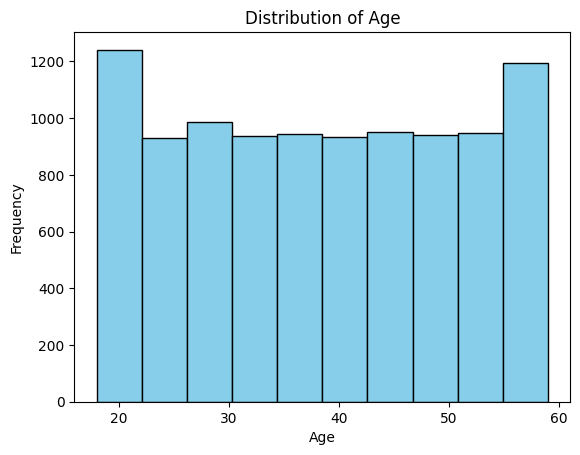

In [37]:
# Histograms to visualize distribution
plt.hist(df2['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


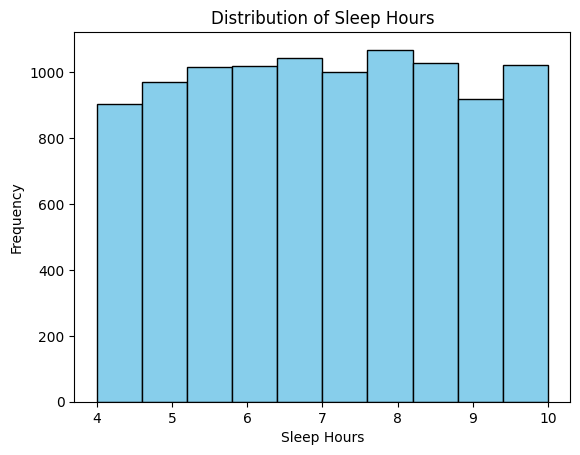

In [39]:
plt.hist(df2['Sleep Hours'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

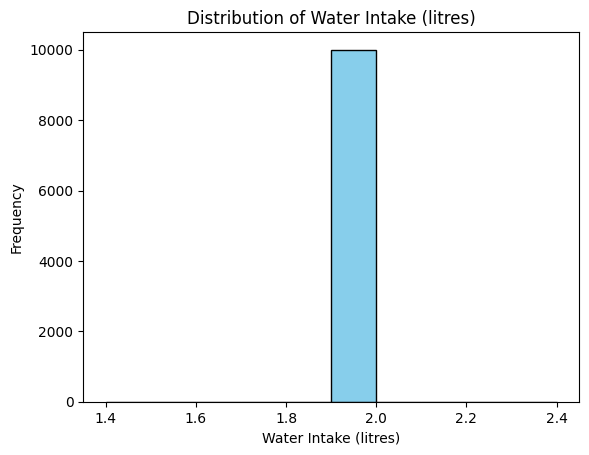

In [40]:
plt.hist(df2['Water Intake (liters)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Water Intake (litres)')
plt.xlabel('Water Intake (litres)')
plt.ylabel('Frequency')
plt.show()

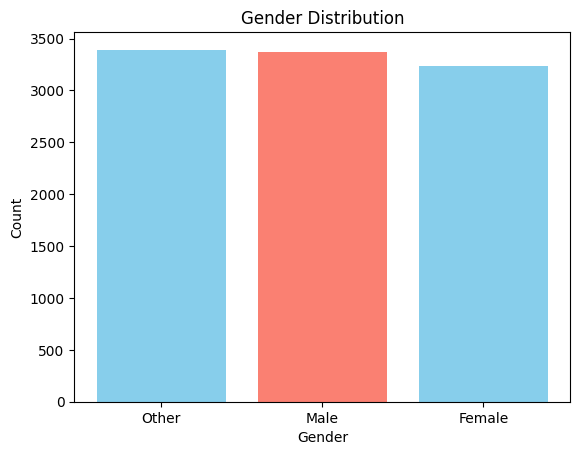

In [41]:
# Bar plot for Gender
gender_counts = df2['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

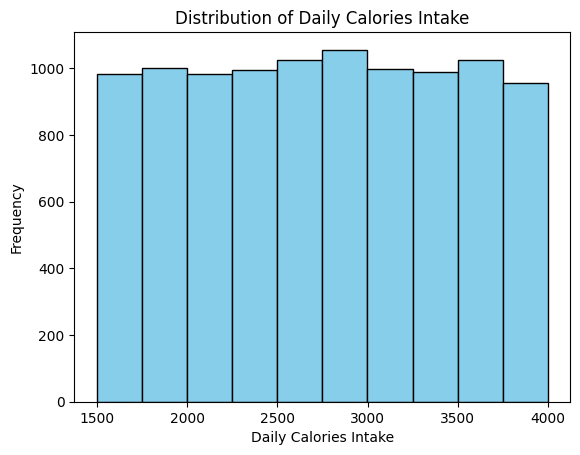

In [42]:
plt.hist(df2['Daily Calories Intake'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Calories Intake')
plt.xlabel('Daily Calories Intake')
plt.ylabel('Frequency')
plt.show()

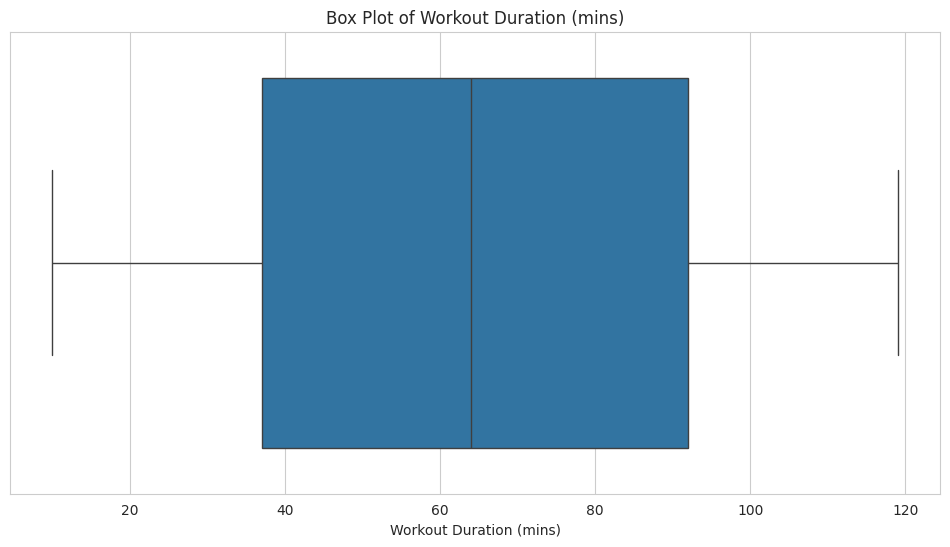

In [44]:
# box plots to visualie distribution of numerical data
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
plt.title('Box Plot of Workout Duration (mins)')
sns.boxplot(x = df2["Workout Duration (mins)"])
plt.show()

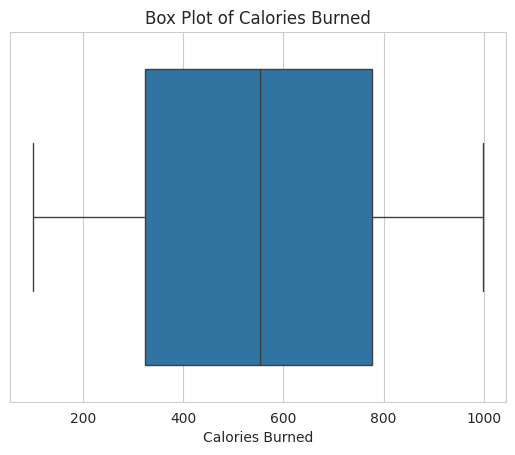

In [46]:
plt.title('Box Plot of Calories Burned')
sns.boxplot(x = df2["Calories Burned"])
plt.show()

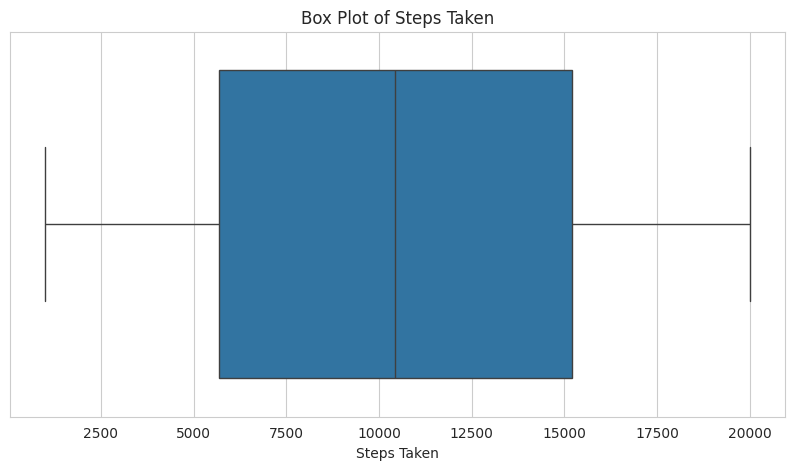

In [47]:
plt.figure(figsize=(10, 5))

plt.title('Box Plot of Steps Taken')
sns.boxplot(x = df2["Steps Taken"])
plt.show()

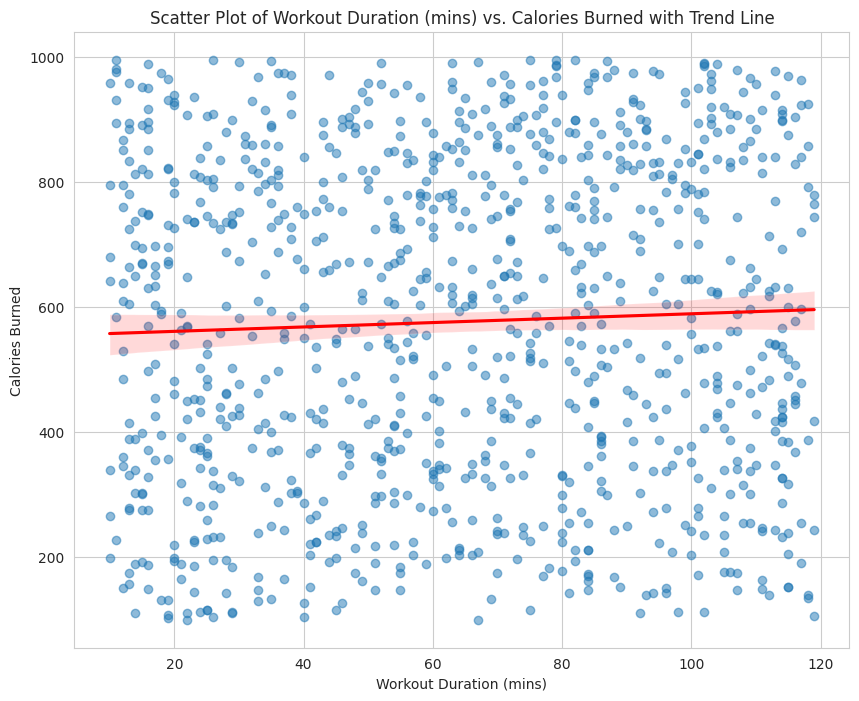

In [48]:
# scatter plot for Workout Duration vs Calories Burned

 # Randomly sample 1000 rows from the DataFrame 'df' and store it in 'df_sampled'
df_sampled = df2.sample(1000)
# Set the figure size for the plot
plt.figure(figsize=(10, 8))
# Create a regression plot (scatter plot with a trend line) for 'Workout Duration' vs 'Calories Burned'
# scatter_kws controls the transparency of the scatter points, and line_kws sets the color of the trend line
sns.regplot(x=df_sampled['Workout Duration (mins)'], y=df_sampled['Calories Burned'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# Set the title of the plot
plt.title('Scatter Plot of Workout Duration (mins) vs. Calories Burned with Trend Line')
# Set the labels for the x and y axes
plt.xlabel('Workout Duration (mins)')
plt.ylabel('Calories Burned')
# Enable grid lines on the plot
plt.grid(True)
# Display the plot
plt.show()

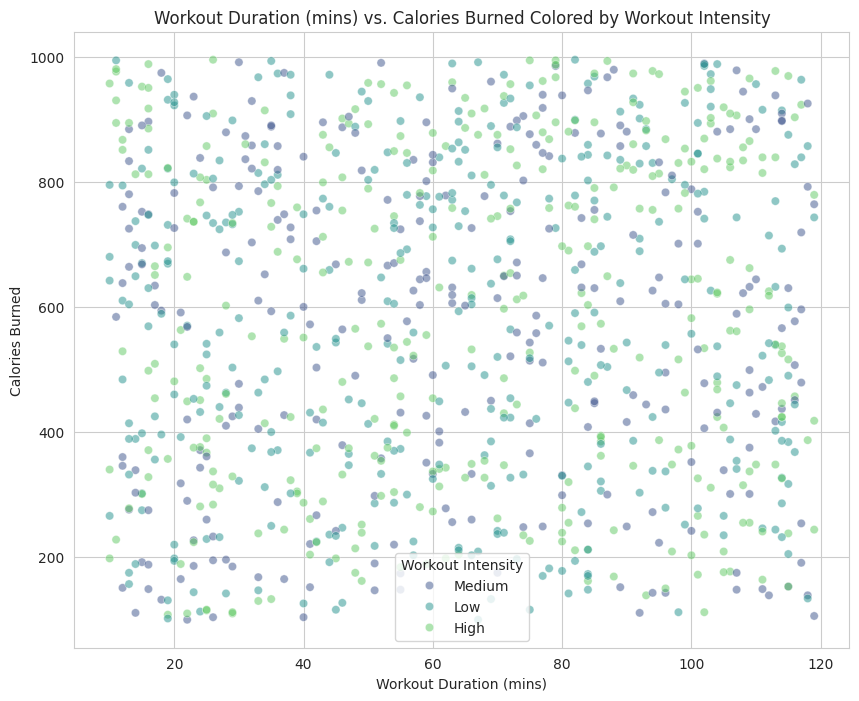

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_sampled['Workout Duration (mins)'],
                y=df_sampled['Calories Burned'],
                hue=df_sampled['Workout Intensity'],
                palette="viridis", alpha=0.5)
plt.title('Workout Duration (mins) vs. Calories Burned Colored by Workout Intensity')
plt.xlabel('Workout Duration (mins)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

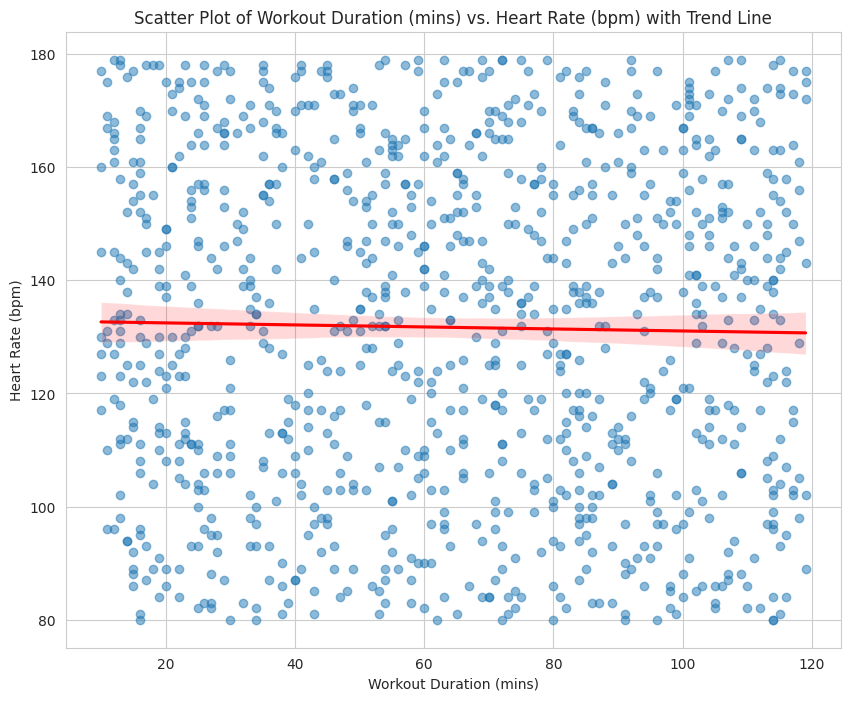

In [50]:
# scatter plot for Workout Duration vs Heart Rate

# Set the figure size for the plot
plt.figure(figsize=(10, 8))
# Create a regression plot (scatter plot with a trend line) for 'Workout Duration' vs 'Heart Rate'
# scatter_kws controls the transparency of the scatter points, and line_kws sets the color of the trend line
sns.regplot(x=df_sampled['Workout Duration (mins)'], y=df_sampled['Heart Rate (bpm)'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# Set the title of the plot
plt.title('Scatter Plot of Workout Duration (mins) vs. Heart Rate (bpm) with Trend Line')
# Set the labels for the x and y axes
plt.xlabel('Workout Duration (mins)')
plt.ylabel('Heart Rate (bpm)')
# Enable grid lines on the plot
plt.grid(True)
# Display the plot
plt.show()

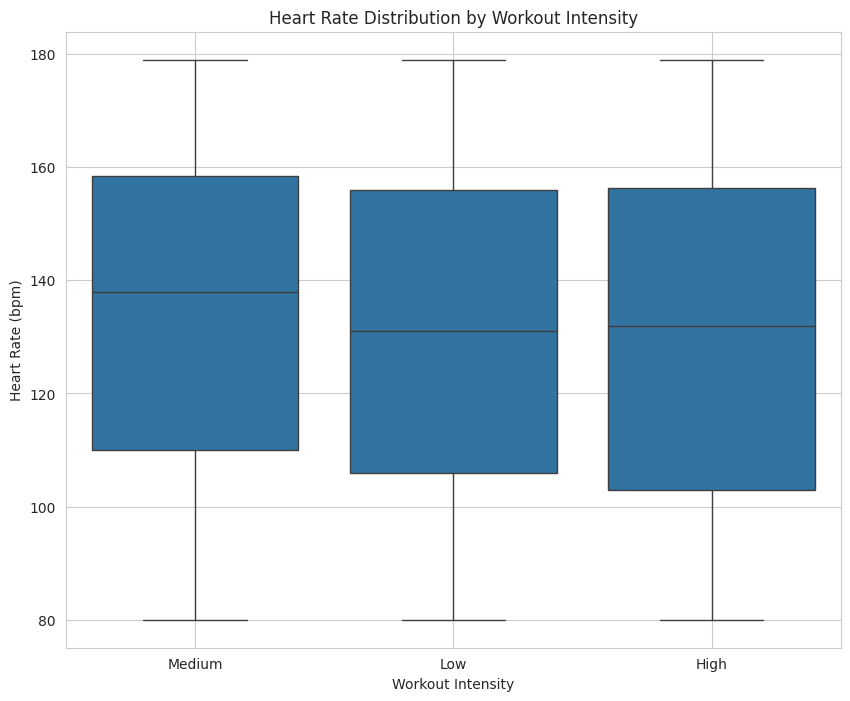

In [51]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_sampled['Workout Intensity'], y=df_sampled['Heart Rate (bpm)'])
plt.title('Heart Rate Distribution by Workout Intensity')
plt.xlabel('Workout Intensity')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.show()

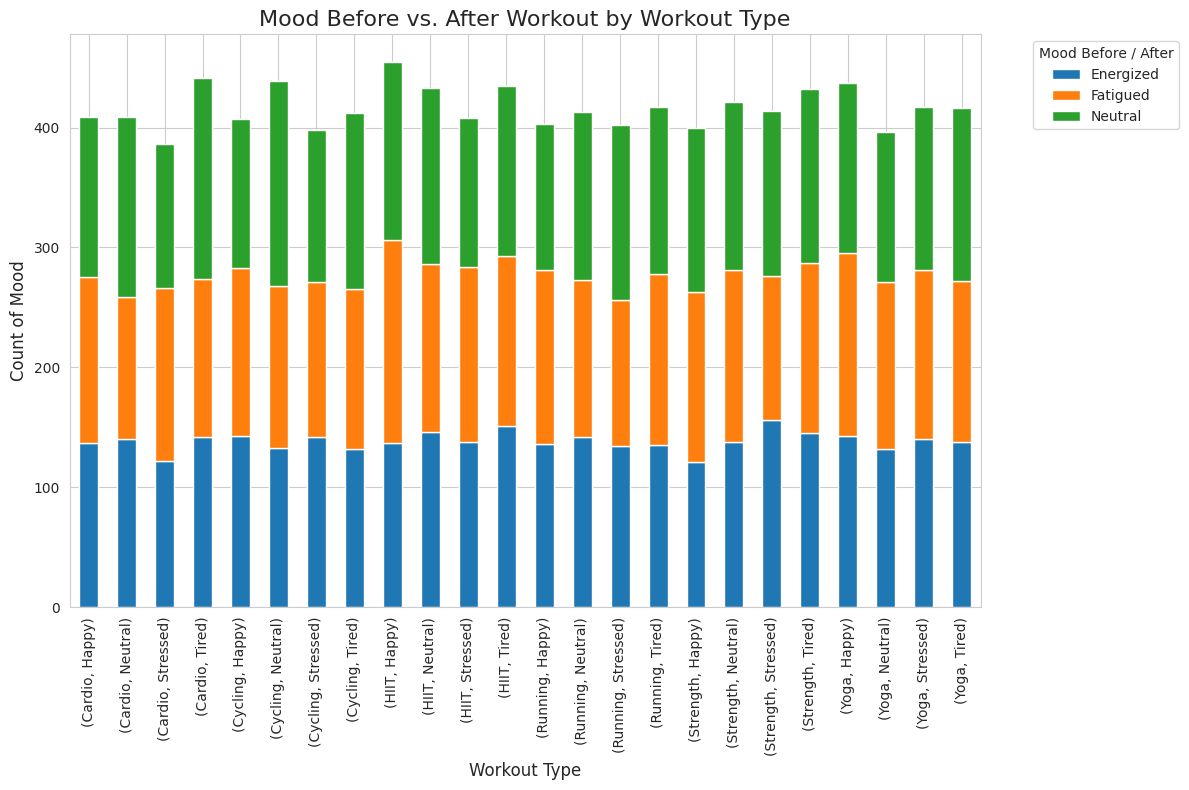

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Workout Type' and 'Mood Before Workout' and 'Mood After Workout' and count the occurrences
mood_counts = df2.groupby(['Workout Type', 'Mood Before Workout', 'Mood After Workout']).size().unstack(fill_value=0)

# Plot the stacked bar chart
mood_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the title and labels for the chart
plt.title('Mood Before vs. After Workout by Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Count of Mood', fontsize=12)

# Display the legend
plt.legend(title='Mood Before / After', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display grid lines
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


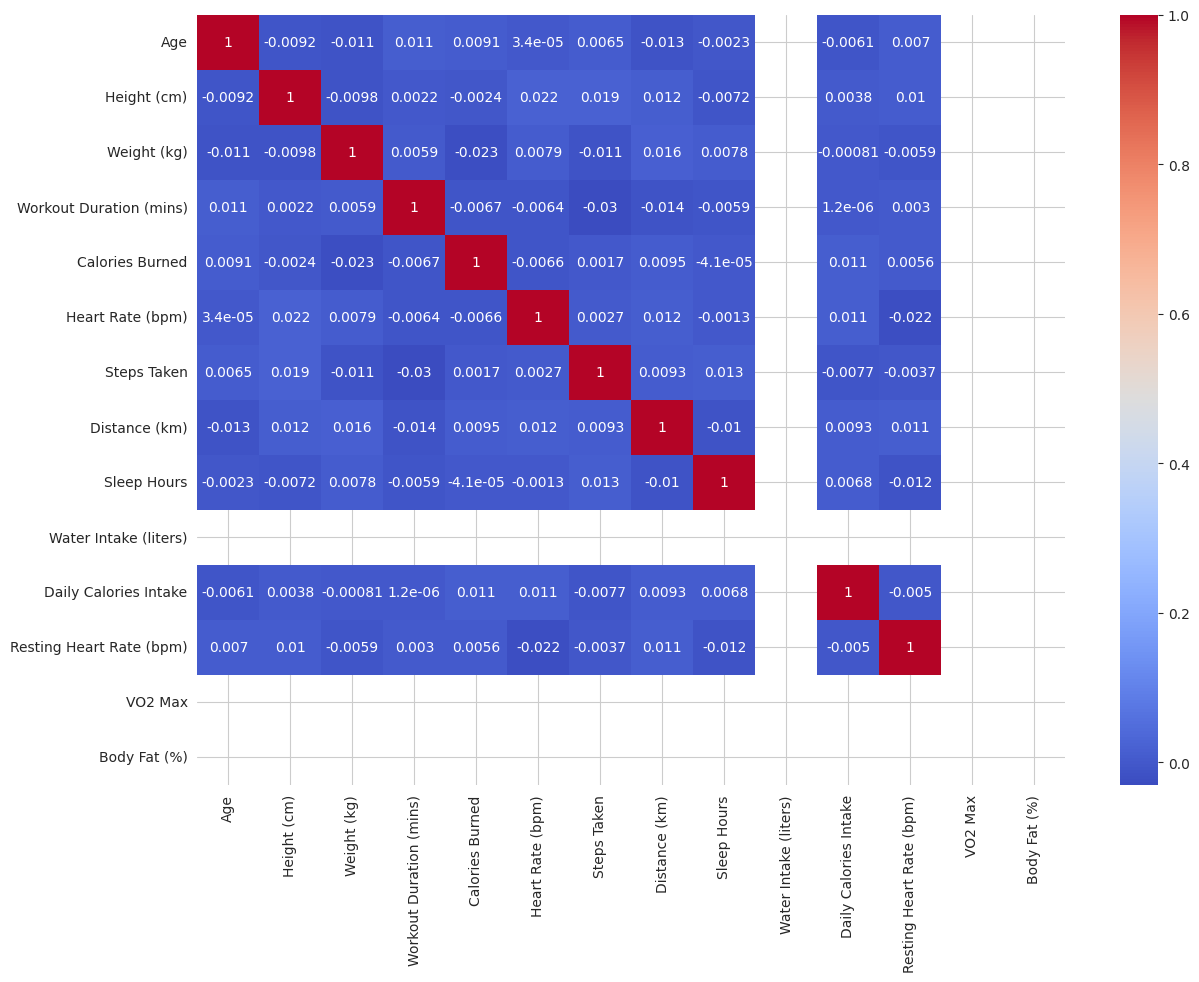

In [55]:
# Compute the correlation matrix for all numerical columns in df
corr = df2[num_cols].corr()

# Set figure size
plt.figure(figsize=(14, 10))  # Increase the figure size (width, height)

# Plot a heatmap of the correlation matrix with annotations and the 'coolwarm' color map
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [57]:
# Sample 10 rows randomly
sampled_df = df2.sample(10, random_state=42)

# Select columns with blank rows
selected_columns = sampled_df[['Water Intake (liters)', 'VO2 Max', 'Body Fat (%)']]

# Print the result
print(selected_columns)

      Water Intake (liters)  VO2 Max  Body Fat (%)
6252                    1.9     38.4          28.5
4684                    1.9     38.4          28.5
1731                    1.9     38.4          28.5
4742                    1.9     38.4          28.5
4521                    1.9     38.4          28.5
6340                    1.9     38.4          28.5
576                     1.9     38.4          28.5
5202                    1.9     38.4          28.5
6363                    1.9     38.4          28.5
439                     1.9     38.4          28.5


In [58]:
# dataset is clean( no missing values, no duplicate values and no outliers)
# dropping the three columns from earlier as they have no importsnce in out model building task
df = df2.drop(columns=['Water Intake (liters)', 'VO2 Max', 'Body Fat (%)'])

In [59]:
df2.columns


Index(['Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type',
       'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)',
       'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours',
       'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

In [60]:
# check the unique values and their occurance count in categorical columns
for col in cat_cols:
  print(df[col].value_counts())
  print()

Gender
Other     3392
Male      3370
Female    3238
Name: count, dtype: int64

Workout Type
HIIT        1731
Strength    1667
Yoga        1666
Cycling     1656
Cardio      1645
Running     1635
Name: count, dtype: int64

Workout Intensity
Low       3357
Medium    3323
High      3320
Name: count, dtype: int64

Mood Before Workout
Tired       2553
Happy       2511
Neutral     2511
Stressed    2425
Name: count, dtype: int64

Mood After Workout
Neutral      3356
Energized    3323
Fatigued     3321
Name: count, dtype: int64



### 5. Data Preparation

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print("Workout Intensity dtype before encoding : ", df['Workout Intensity'].dtypes)
df['Workout Intensity'] = label_encoder.fit_transform(df['Workout Intensity'])
print("Workout Intensity dtype after encoding : ", df['Workout Intensity'].dtypes)

Workout Intensity dtype before encoding :  object
Workout Intensity dtype after encoding :  int64


In [62]:
print("Gender dtype before encoding : ", df['Gender'].dtypes)
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print("Gender dtype after encoding : ", df['Gender'].dtypes)

Gender dtype before encoding :  object
Gender dtype after encoding :  int64


In [63]:
print("Workout Type dtype before encoding : ", df['Workout Type'].dtypes)
df['Workout Type'] = label_encoder.fit_transform(df['Workout Type'])
print("Workout Type dtype after encoding : ", df['Workout Type'].dtypes)

Workout Type dtype before encoding :  object
Workout Type dtype after encoding :  int64


In [64]:
print("Mood Before Workout dtype before encoding : ", df['Mood Before Workout'].dtypes)
df['Mood Before Workout'] = label_encoder.fit_transform(df['Mood Before Workout'])
print("Mood Before Workout dtype after encoding : ", df['Mood Before Workout'].dtypes)

Mood Before Workout dtype before encoding :  object
Mood Before Workout dtype after encoding :  int64


In [65]:
print("Mood After Workout dtype before encoding : ", df['Mood After Workout'].dtypes)
df['Mood After Workout'] = label_encoder.fit_transform(df['Mood After Workout'])
print("Mood After Workout dtype after encoding : ", df['Mood After Workout'].dtypes)

Mood After Workout dtype before encoding :  object
Mood After Workout dtype after encoding :  int64


In [66]:
for col in cat_cols:
  print(df[col].value_counts())
  print()

Gender
2    3392
1    3370
0    3238
Name: count, dtype: int64

Workout Type
2    1731
4    1667
5    1666
1    1656
0    1645
3    1635
Name: count, dtype: int64

Workout Intensity
1    3357
2    3323
0    3320
Name: count, dtype: int64

Mood Before Workout
3    2553
0    2511
1    2511
2    2425
Name: count, dtype: int64

Mood After Workout
2    3356
0    3323
1    3321
Name: count, dtype: int64



In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Height (cm)', 'Weight (kg)','Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)','Steps Taken', 'Distance (km)', 'Sleep Hours','Daily Calories Intake', 'Resting Heart Rate (bpm)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Mood Before Workout,Mood After Workout
0,0.050111,1,0.050200,0.698254,1,0.456890,-0.645011,-0.607033,-0.292645,1.591573,0,0.712363,0.622769,-0.733734,3,1
1,-0.196376,2,-1.196315,1.342171,0,0.268290,0.229836,1.332514,-1.391595,-1.615976,0,0.946465,-0.289271,0.303773,0,0
2,-1.100162,0,0.396454,-0.936305,2,-1.177644,-0.046431,0.120297,1.538876,-0.130020,0,1.648773,0.855661,0.908986,0,1
3,1.446870,1,-1.404067,0.202933,1,-0.800444,0.460059,-0.399225,0.664674,-0.305545,2,-0.692253,-0.944714,-0.387898,1,2
4,1.200383,2,1.365965,-1.283030,4,-0.266077,-0.545248,1.401784,1.105056,-1.118253,2,0.185632,0.766409,-0.906652,2,0


In [68]:
# Split the dataset into training and testing sets (assuming df is preprocessed)
X = df.drop(columns=['Mood After Workout'])
y = df['Mood After Workout']  # Define the target variable

In [69]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 15)
X_test shape: (2000, 15)
y_train shape: (8000,)
y_test shape: (2000,)


### 6. Model Building

In [70]:
# Import Necessary Libraries for Model Building
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
model1 = LogisticRegression()  # Initialize logistic regression model
model1.fit(X_train, y_train)  # Train the model on training data
y_pred1 = model1.predict(X_test)  # Predict target values for test set
accuracy1 = accuracy_score(y_test, y_pred1)  # Calculate model accuracy
accuracy1

0.3255

In [72]:
model2 = SVC(kernel='linear')  # Initialize SVM model with linear kernel
model2.fit(X_train, y_train)  # Train the model on training data
y_pred2 = model2.predict(X_test)  # Predict target values for test set
accuracy2 = accuracy_score(y_test, y_pred2)  # Calculate model accuracy
accuracy2

0.3215

In [73]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest with 100 trees
model3.fit(X_train, y_train)  # Train the model on training data
y_pred3 = model3.predict(X_test)  # Predict target values for test set
accuracy3 = accuracy_score(y_test, y_pred3)  # Calculate model accuracy
accuracy3

0.332

In [74]:
model4 = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
model4.fit(X_train, y_train)  # Train the model on training data
y_pred4 = model4.predict(X_test)  # Predict target values for test set
accuracy4 = accuracy_score(y_test, y_pred4)  # Calculate model accuracy
accuracy4

0.3205

In [75]:
# Print the accuracy of all models
print("Accuracy of Logistic Regression : ", accuracy1)
print("Accuracy of SVM : ", accuracy2)
print("Accuracy of Random Forest : ", accuracy3)
print("Accuracy of K-Nearest Neighbors : ", accuracy4)

Accuracy of Logistic Regression :  0.3255
Accuracy of SVM :  0.3215
Accuracy of Random Forest :  0.332
Accuracy of K-Nearest Neighbors :  0.3205


In [76]:
# Store predictions from different models in a dictionary
model_preds = {
    "Logistic Regression" : y_pred1,
    "Support Vector Machine" : y_pred2,
    "Random Forest" : y_pred3,
    "K-Nearest Neighbors": y_pred4
}

# Iterate through each model and plot its confusion matrix
for model, pred in model_preds.items():
    print("model : ", model)
    print(confusion_matrix(y_test, pred))  # Display confusion matrix for each model
    print('----------------------------')

model :  Logistic Regression
[[149 260 256]
 [146 258 253]
 [160 274 244]]
----------------------------
model :  Support Vector Machine
[[154 261 250]
 [144 244 269]
 [177 256 245]]
----------------------------
model :  Random Forest
[[254 194 217]
 [231 202 224]
 [226 244 208]]
----------------------------
model :  K-Nearest Neighbors
[[294 216 155]
 [320 196 141]
 [298 229 151]]
----------------------------


### 7. Model Evaluation

In [77]:
# Iterate through each model and display its classification report
for model, pred in model_preds.items():
    print("model : ", model)
    print(classification_report(y_test, pred, zero_division=0))  # Display classification report for each model
    print('----------------------------')

model :  Logistic Regression
              precision    recall  f1-score   support

           0       0.33      0.22      0.27       665
           1       0.33      0.39      0.36       657
           2       0.32      0.36      0.34       678

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.33      0.33      0.32      2000

----------------------------
model :  Support Vector Machine
              precision    recall  f1-score   support

           0       0.32      0.23      0.27       665
           1       0.32      0.37      0.34       657
           2       0.32      0.36      0.34       678

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.32      0.32      0.32      2000

----------------------------
model :  Random Forest
              precision    recall  f1-score   support

           0       0.36      0.38      0.